In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
# 1 read the data set: 
data=fetch_california_housing()

In [4]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [6]:
# preparation data

In [7]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [8]:
data.target_names

['MedHouseVal']

In [9]:
data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [10]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [11]:
df=pd.DataFrame(data.data, columns=data.feature_names)

In [12]:
df['prize']=data.target

In [13]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,prize
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [14]:
# 2 EDA, data cleanign
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   prize       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [15]:
df.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
prize         float64
dtype: object

In [16]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,prize
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [17]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,prize
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [18]:
df.sample(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,prize
5415,6.4755,36.0,5.812950,1.002398,1123.0,2.693046,34.01,-118.45,4.058
6843,2.3664,20.0,3.685121,1.131488,1870.0,3.235294,34.07,-118.13,1.922
6425,3.5481,35.0,4.547511,1.013575,742.0,3.357466,34.13,-118.00,1.581


In [19]:
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
prize         0
dtype: int64

In [20]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,prize
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [21]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,prize
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
prize,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

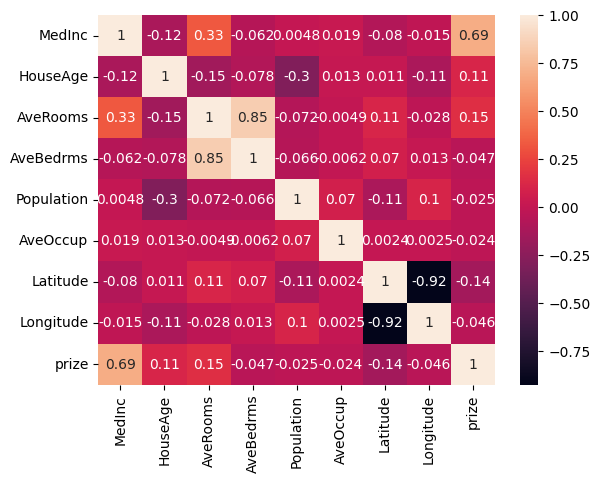

In [22]:
sns.heatmap(df.corr(), annot=True)

In [23]:
# 4 divide the data in X and y

In [24]:
X=df.iloc[:,:-1]  # independet variable
y=df.iloc[:,-1]  # dependent variavle

In [25]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [26]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: prize, Length: 20640, dtype: float64

In [27]:
type(y)

pandas.core.series.Series

In [28]:
# 5 train test spit
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.30, random_state=1)

In [30]:
X_train.shape, X_test.shape

((14448, 8), (6192, 8))

In [31]:
y_train.shape, y_test.shape

((14448,), (6192,))

In [32]:
# 6 scalling 

from sklearn.preprocessing import StandardScaler

In [33]:
scaler=StandardScaler()

In [34]:
X_train=scaler.fit_transform(X_train)

In [35]:
X_test=scaler.transform(X_test)

In [36]:
X_train

array([[-0.50715954, -1.07853296, -0.44712678, ..., -0.03473461,
        -0.68811806,  0.64821297],
       [-0.36780162,  0.98848922, -0.40478899, ...,  0.04136812,
        -0.85669979,  0.6531961 ],
       [-0.72098999,  1.62449604, -0.21327712, ..., -0.03379571,
         0.52473385, -0.08929041],
       ...,
       [-1.45114921,  1.06799007, -0.2117232 , ..., -0.03858451,
        -0.79582306,  0.6531961 ],
       [-0.65684615, -1.47603722, -0.17247966, ..., -0.02821367,
        -0.88947957,  1.2013405 ],
       [-0.83089789,  0.5114841 , -0.31691522, ..., -0.04325394,
         1.01174774, -1.31015748]])

In [37]:
X_test

array([[-0.32961194,  0.82948751, -0.36257229, ..., -0.10860423,
        -0.73494632,  0.60336479],
       [-1.00314873,  0.67048581, -0.17365888, ..., -0.0414458 ,
         0.53878233, -0.1042398 ],
       [ 0.07463726,  1.38599348, -0.37148887, ...,  0.05285456,
         0.98365079, -1.41978636],
       ...,
       [-0.68105238,  1.46549433, -0.2930547 , ..., -0.02800075,
         1.166281  , -1.33507314],
       [-0.66871091, -1.23753466, -0.15265383, ..., -0.03129222,
         1.14286687, -1.33009001],
       [-1.14621438,  0.03447898, -0.98708262, ..., -0.01613065,
        -0.71621502,  0.63326357]])

In [38]:
# 7 model training: 
from sklearn.linear_model import LinearRegression

In [39]:
model=LinearRegression()

In [40]:
model

LinearRegression()

In [41]:
model.fit(X_train, y_train)

LinearRegression()

In [42]:
X_train.shape

(14448, 8)

In [43]:
model.coef_

array([ 0.83265521,  0.12186056, -0.2692169 ,  0.31217484, -0.00634786,
       -0.04074974, -0.90369005, -0.8787625 ])

In [44]:
len(model.coef_)

8

In [45]:
model.intercept_

2.076531482558146

In [46]:
y_pred=model.predict(X_test)

In [47]:
y_pred

array([2.12598355, 0.94104495, 2.71042934, ..., 1.85617769, 1.54295782,
       1.51367783])

In [48]:
# 8 preformance matrices: 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [49]:
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.5296293151408233
0.5352476763196591
0.7277563569910079


In [50]:
# r2 and adjusted r2: 
R2=r2_score(y_test, y_pred)

In [51]:
R2

0.5971429737359629

In [52]:
# adjusted R2

1-(1-R2)*(len(y_test-1)/(len(y_test)-X_test.shape[1]-1))

0.5965565734066121

In [53]:
# always adjusted r2<r2

In [54]:
# assumption: 
# 1: x and y linear relationship

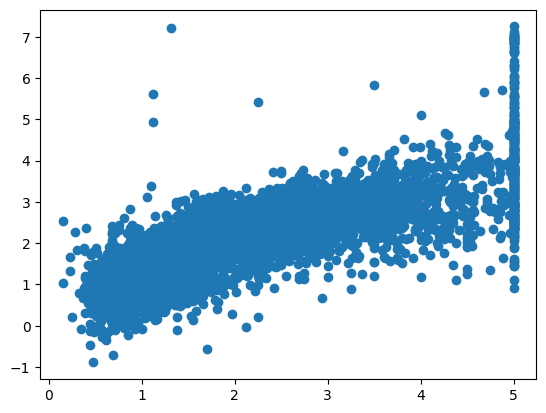

In [55]:
plt.scatter(y_test, y_pred)

In [56]:
error=y_test-y_pred

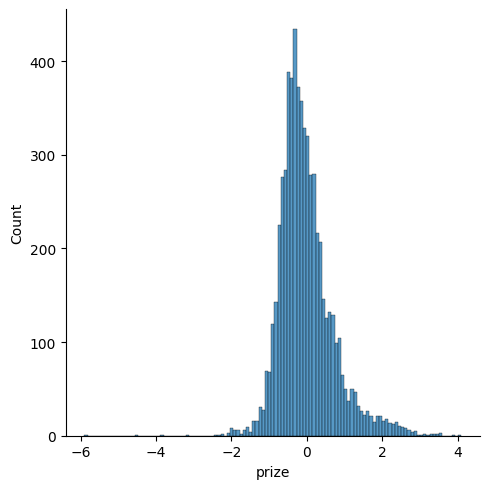

In [57]:
sns.displot(error)

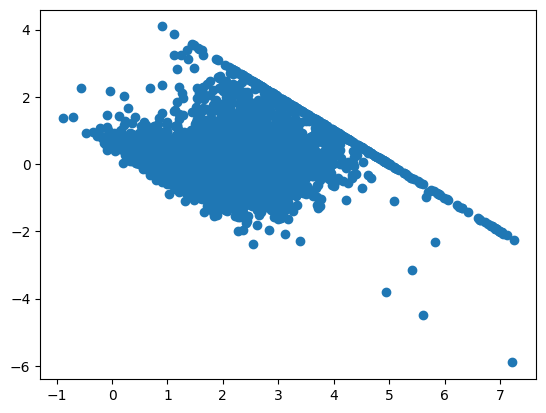

In [58]:
# scatter plot of y_pred and resudual

plt.scatter(y_pred, error)  # variabncer of error are cdonstant

In [59]:
model

LinearRegression()

In [60]:
type(model)

sklearn.linear_model._base.LinearRegression

Python pickle module is used for serialising and de-serialising a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serialises” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script

#pickle>> aloows you to store the python object on the disk<br>

#serialization :  Serialization is the process of converting a data structure or object into a format that can be easily stored, transmitted, or persisted. During serialization, the object's state is converted into a stream of bytes or other formats that can be written to disk, sent over a network, or stored in memory

#Deserialization>>Deserialization is the process of reconstructing a serialized object back into its original form. During deserialization, the serialized data is read and converted back into a data structure or object that matches the original.

In [61]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))# python object(model) , its attribute and methods is converted into byte string(wb: write binary)

In [63]:
model=pickle.load(open('model.pkl', 'rb'))

# we can use any where we want may be new notbook

In [64]:
model.predict(X_test)

array([2.12598355, 0.94104495, 2.71042934, ..., 1.85617769, 1.54295782,
       1.51367783])